In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.keys())
print(dataset.feature_names)
print(dataset.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

#### Load the data in a dataframe and print the first rows 

In [3]:
def load_dataframe(dataset):
    df = pd.DataFrame(data = np.c_[dataset['data'], dataset['target']],
                     columns= np.append(dataset['feature_names'], 'MEDV (target)'))
##    Alternative method
##     df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    return df

In [4]:
boston_dataframe = load_dataframe(dataset)

In [5]:
## In case alternative method is used, add MEDV column to the dataset 
# boston_dataframe['MEDV'] = dataset.target
boston_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV (target)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
print(boston_dataframe[:20])

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

## Cleaning and Pre-processing

In [7]:
def count_missing_values(boston_dataframe):
    return boston_dataframe.isnull().sum().sort_values(ascending=False)

In [8]:
print(count_missing_values(boston_dataframe))

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV (target)    0
dtype: int64


## Data Analysis

#### Plot each attribute in a histogram 

In [9]:
def print_plot_univariate(df):
    return df.hist(column=df.columns,figsize=(14, 14), color='xkcd:indigo', bins=30)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV (target)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

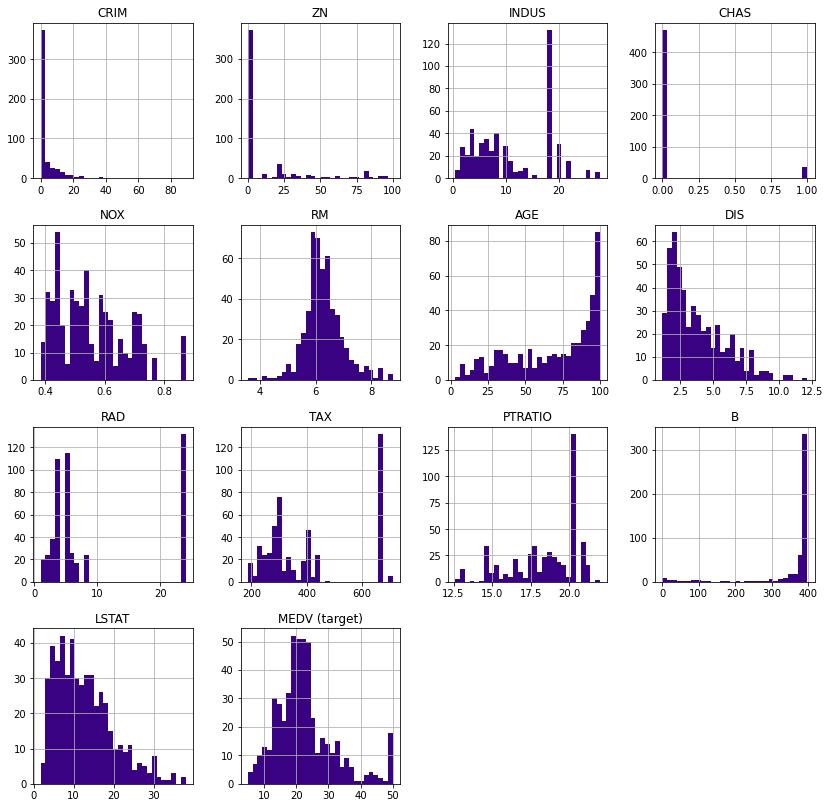

In [10]:
print_plot_univariate(boston_dataframe)

### Looking for correlations


#### Write a function compute_correlations_matrix to compute Pearson's correlations between every pair of attributes 

In [11]:
def compute_correlations_matrix(df):
    return df.corr()

In [12]:
correlations = compute_correlations_matrix(boston_dataframe)

In [13]:
# What is the correlation coefficient between the median value and the number of rooms?
correlations['MEDV (target)']['RM']

0.6953599470715401

We can see that RM has a strong positive correlation and is expected to have a high impact on the price

#### Analyse the correlations between the median value and the other attributes. Which attribute is the most negatively correlated with the median value? Does it make sense to you? 

<AxesSubplot:>

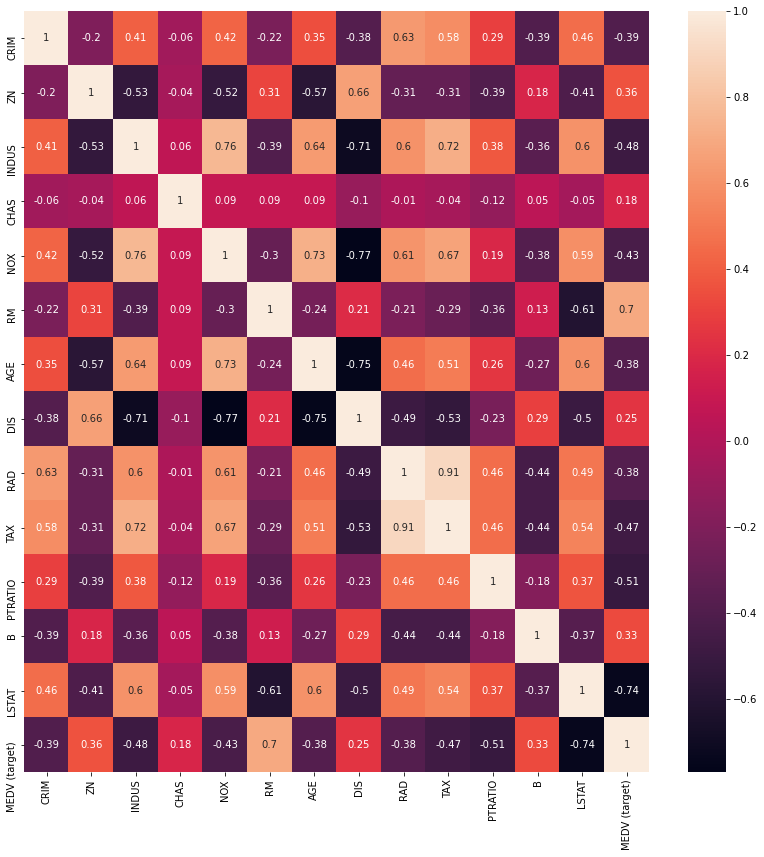

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,14))  
correlation_matrix = compute_correlations_matrix(boston_dataframe).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

The easier way to analyze a correlation is by inspecting the heatmap plot as shown above. The RM has a highest positive correlation with MEDV and LSTAT has a highest negative correlation with MEDV.

In [16]:
# LSTAT (% lower status of the population) most negatively correlated with MEDV
correlations['MEDV (target)']['LSTAT']

-0.7376627261740145

#### Plot every attribute against each other 

In [17]:
# Plot every attribute against each other
def print_plot_multivariate(df):
    return scatter_matrix(df, figsize = (30,30))

array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot:xlabel='MEDV (target)', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:

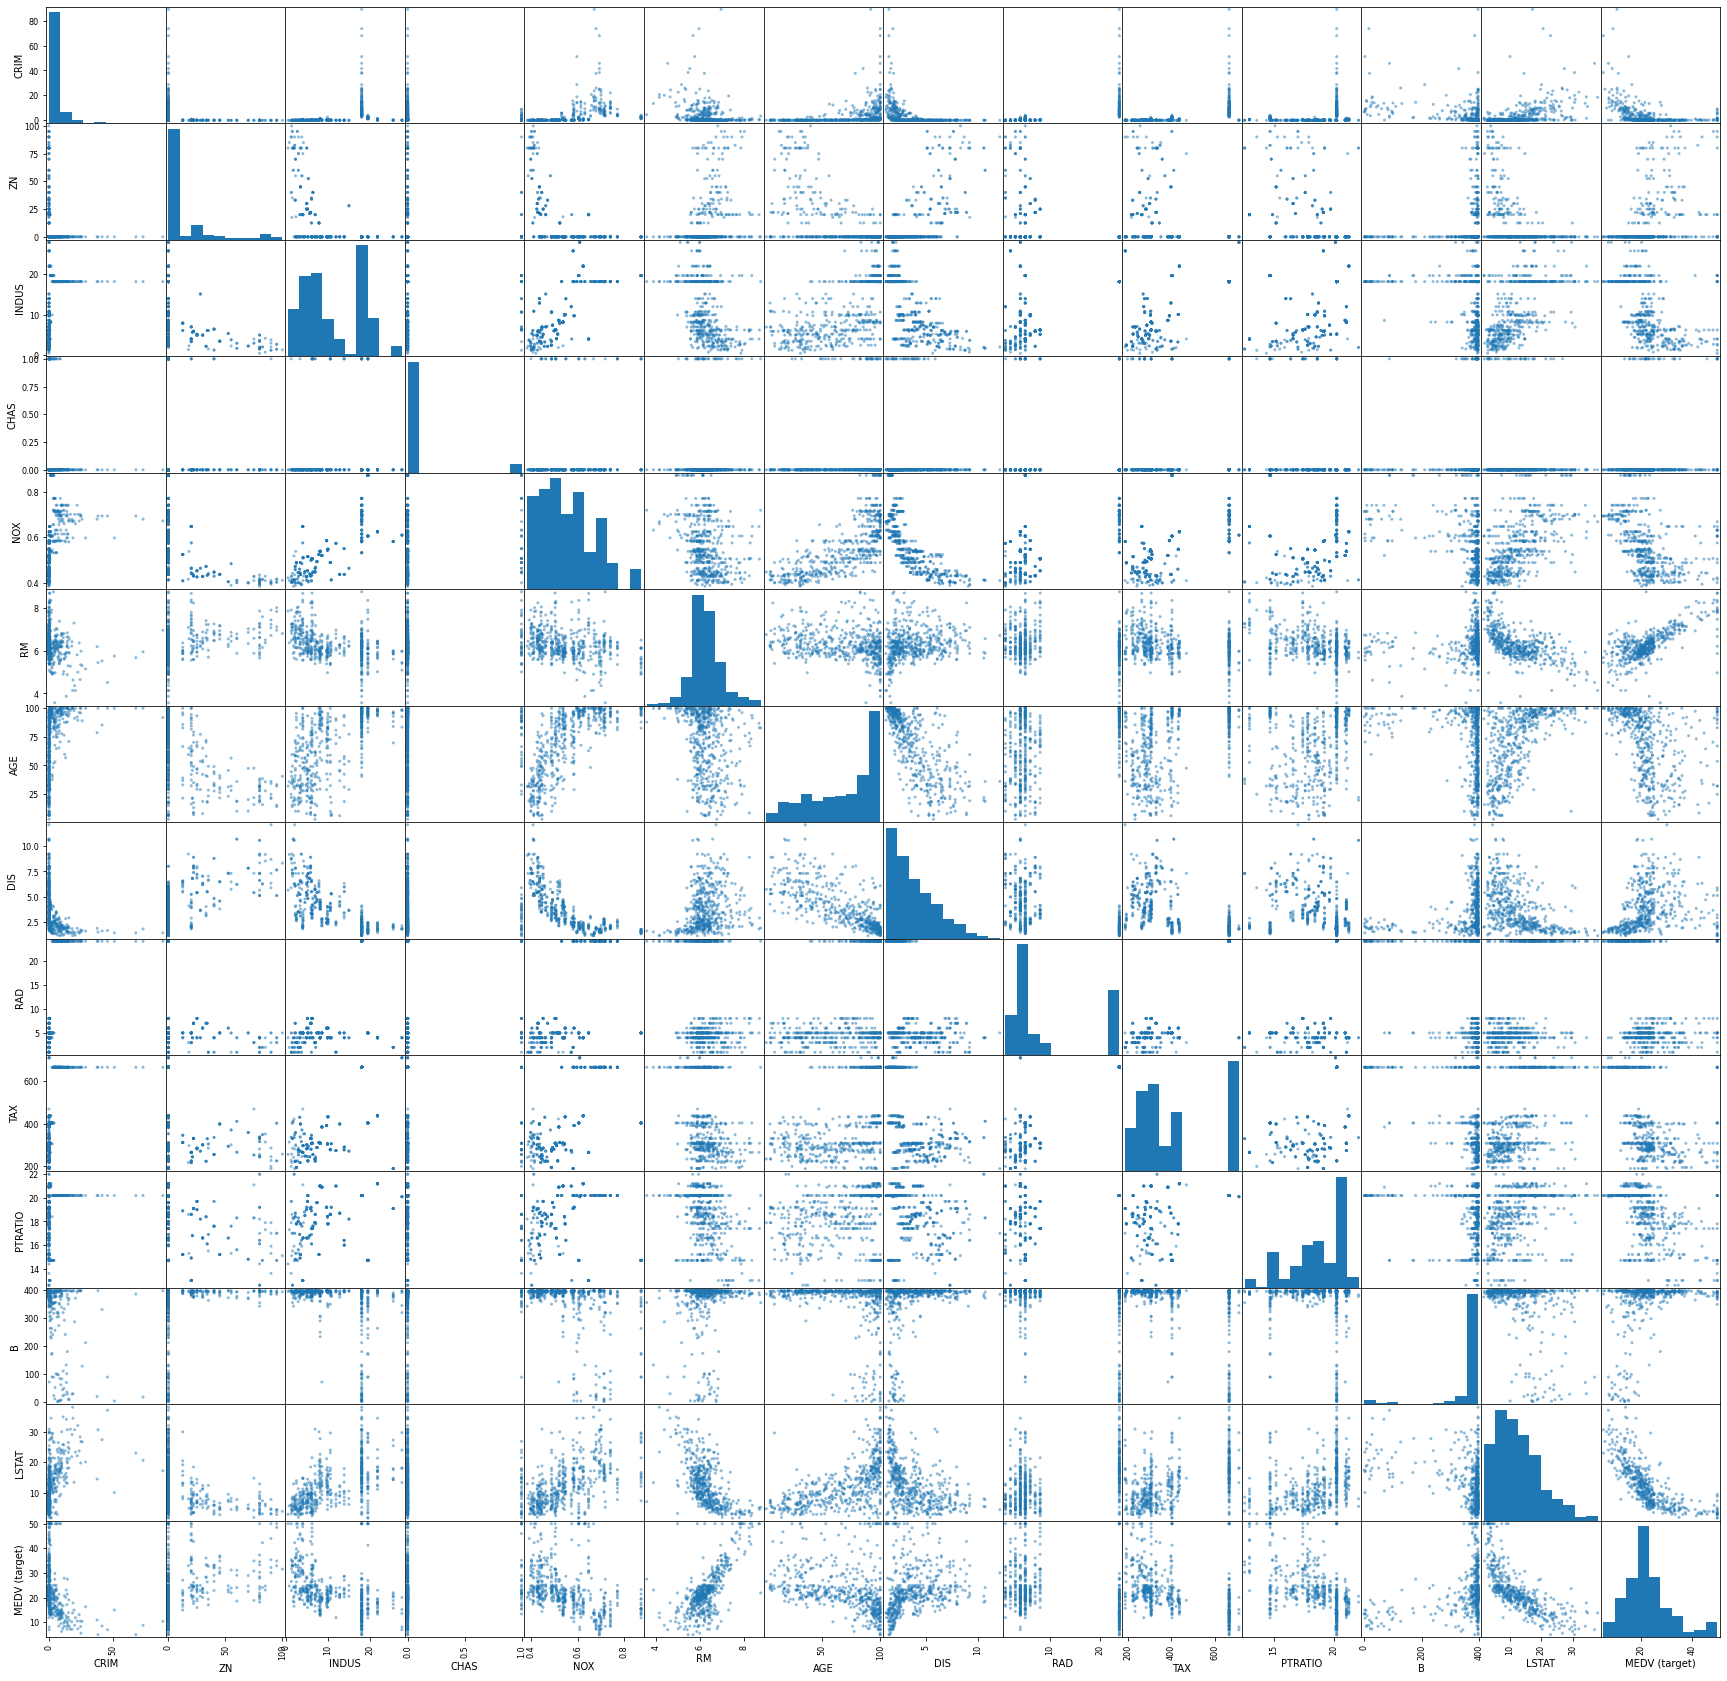

In [18]:
print_plot_multivariate(boston_dataframe)

#### Plot MEDV in function of RM 

In [19]:
def plot(x, y, ylabel=None, xlabel=None):
    fig = plt.figure(figsize=(5, 3), dpi=200)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y, s=10, lw=0, c='xkcd:red')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

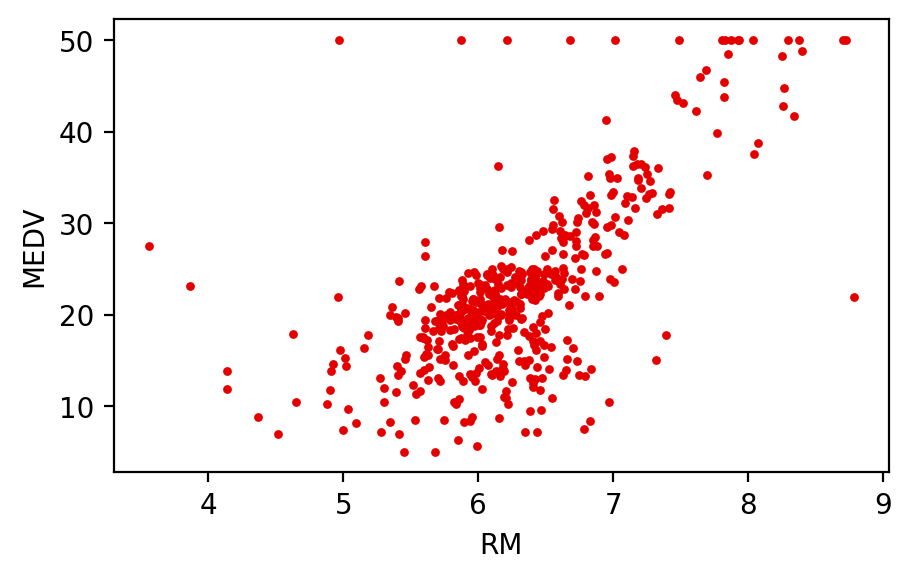

In [20]:
plot(boston_dataframe["RM"], boston_dataframe["MEDV (target)"], ylabel="MEDV", xlabel="RM")

####  Plot the correlation scatter plot of the median value against LSTAT, AGE, and CRIME. 

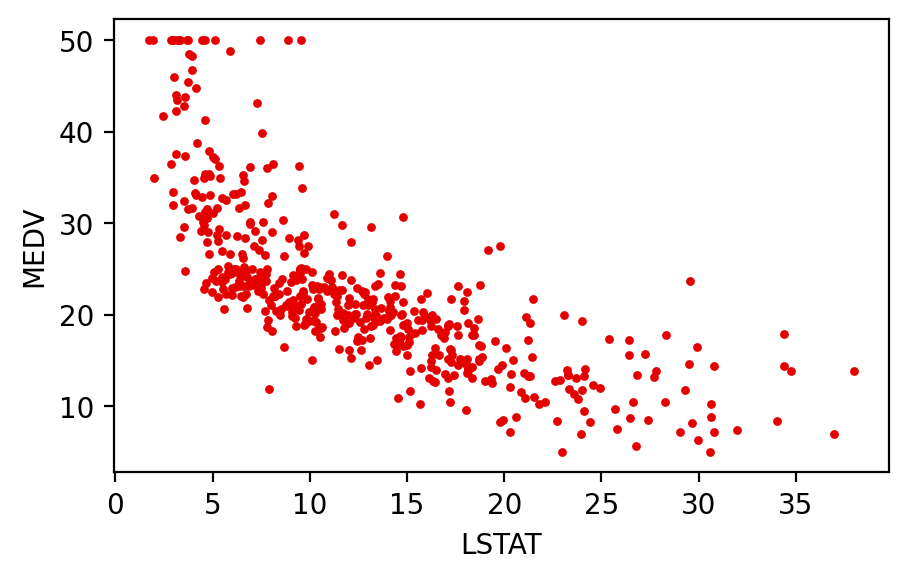

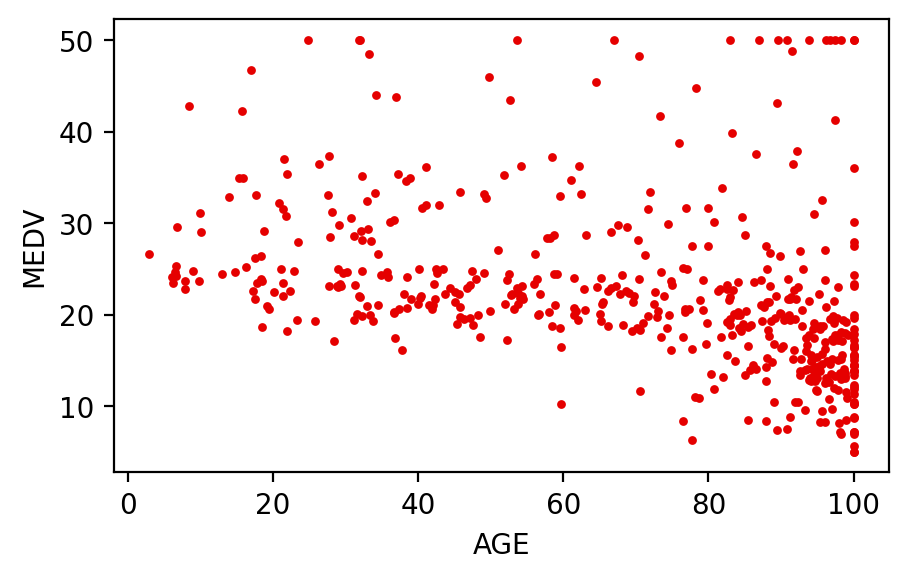

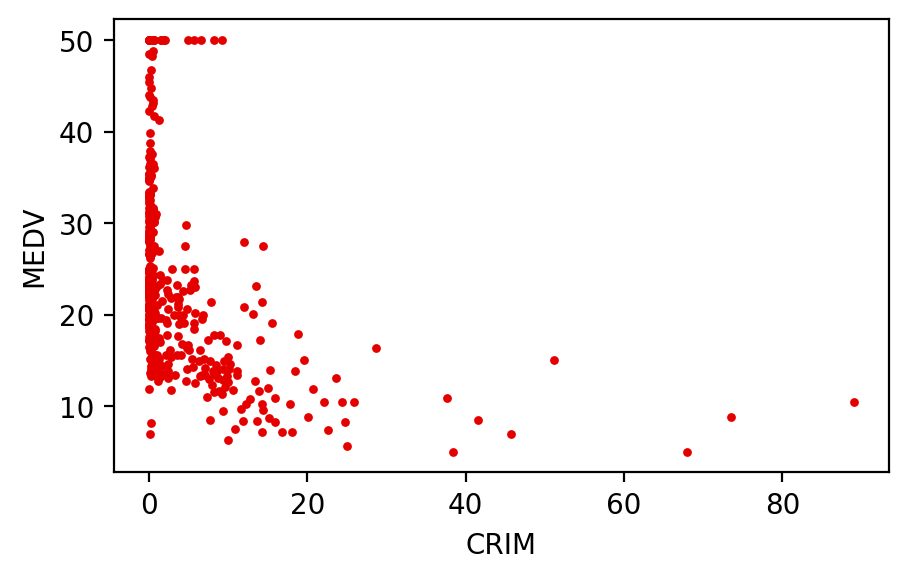

In [21]:
plot(boston_dataframe["LSTAT"], boston_dataframe["MEDV (target)"], ylabel="MEDV", xlabel="LSTAT")
plot(boston_dataframe["AGE"], boston_dataframe["MEDV (target)"], ylabel="MEDV", xlabel="AGE")
plot(boston_dataframe["CRIM"], boston_dataframe["MEDV (target)"], ylabel="MEDV", xlabel="CRIM")

#### What can you observe? What can you say?


It seems that the MEDV is negatively correlated with the LSTAT. However, there are no notable correlations between the MEDV and AGE, and MEDV and CRIM. 

#### Plot the scatter matrix or print the correlation coefficients for LSTAT. What are the attributes which are the most linearly correlated with LSTAT?

In [22]:
correlations['LSTAT']

CRIM             0.455621
ZN              -0.412995
INDUS            0.603800
CHAS            -0.053929
NOX              0.590879
RM              -0.613808
AGE              0.602339
DIS             -0.496996
RAD              0.488676
TAX              0.543993
PTRATIO          0.374044
B               -0.366087
LSTAT            1.000000
MEDV (target)   -0.737663
Name: LSTAT, dtype: float64

In [23]:
# LSTAT seems to be positively linearly correlated with AGE.
correlations['LSTAT']['AGE']

0.6023385287262395

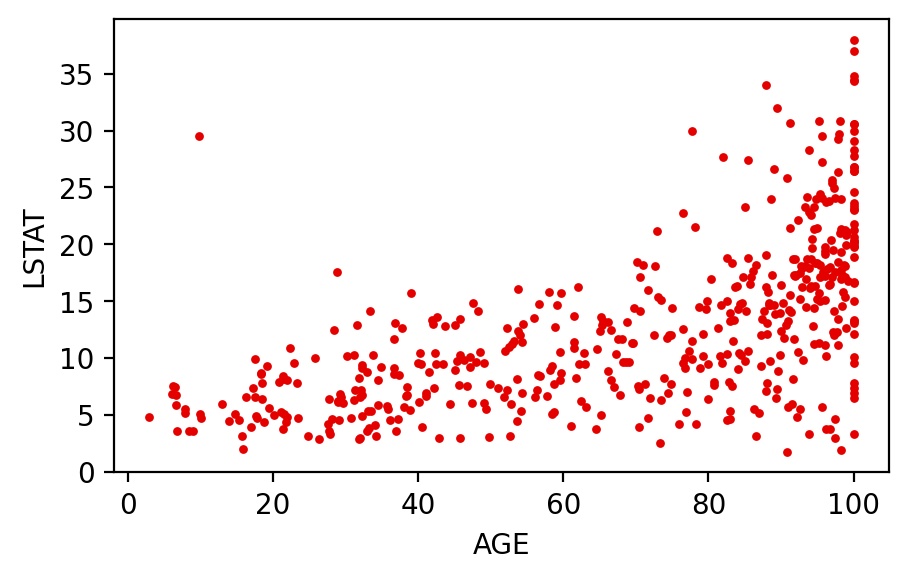

In [24]:
plot(boston_dataframe["AGE"], boston_dataframe["LSTAT"], ylabel="LSTAT", xlabel="AGE")

##  Linear regression predictions

Before moving to the linear regression model, lets remove outliers from the data. Looking at the figure below we can conclude that the MEDV of more than 50 will not help for prediction.

C:\Users\KHAMEDR\AppData\Local\Continuum\anaconda3\envs\4ML\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


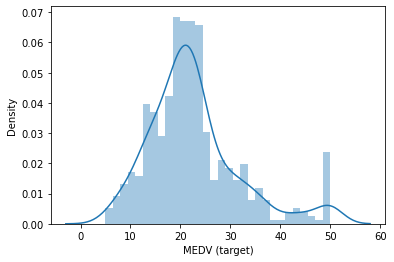

In [25]:
sns.distplot(boston_dataframe["MEDV (target)"], bins=30)
plt.show()

In [26]:
data = boston_dataframe[~(boston_dataframe["MEDV (target)"] >= 50.0)]

C:\Users\KHAMEDR\AppData\Local\Continuum\anaconda3\envs\4ML\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


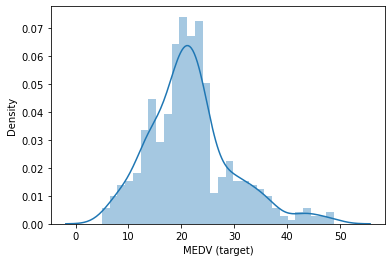

In [27]:
sns.distplot(data["MEDV (target)"], bins=30)
plt.show()

Let's look to correlation one more time. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5. Let's plot these columns against MEDV

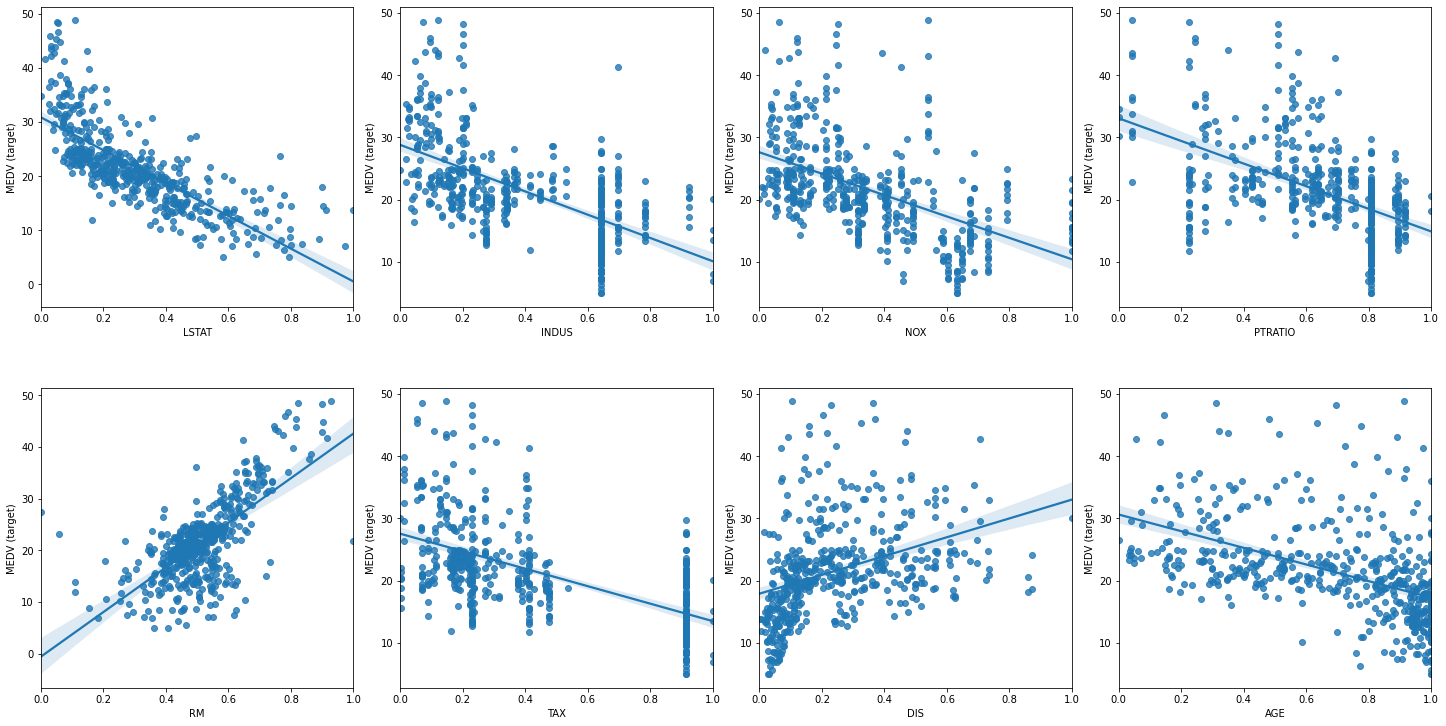

In [28]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ["LSTAT", "INDUS", "NOX", "PTRATIO", "RM", "TAX", "DIS", "AGE"]
x = data.loc[:,column_sels]
y = data["MEDV (target)"]
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We will build a regression model based on LSTAT, INDUS, NOX, PTRATIO, RM, TAX, DIS, AGE  as they have a good correlation with MEDV

In [29]:
X = pd.DataFrame(np.c_[data["RM"], data["LSTAT"], data["INDUS"], data["NOX"], data["PTRATIO"], data["TAX"], data["DIS"], data["AGE"]], 
                 columns = ["RM","LSTAT","INDUS","NOX","PTRATIO","TAX","DIS","AGE"])
Y = data["MEDV (target)"]

Training and testing datasets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Models

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Model will be evaluated based on R2-score and RMSE

In [32]:
# For training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The performance for training set
RMSE is 3.945453664907405
R2 score is 0.7411003128428495


In [33]:
# For testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The performance for testing set
RMSE is 3.8320556200086595
R2 score is 0.7844290495212312


There are many other regression models which can be selected as : polynomial regression,SVR with kernal rbf, DecisionTreeRegressor, KNeighborsRegressor and GradientBoostingRegressor. As an example let's check GradientBoostingRegressor 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, 
                                min_samples_split=2, n_estimators=100, random_state=30)
GBR.fit(X_train, Y_train)

# For training set
y_train_predict = GBR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("======================")

# For testing set
y_test_predict = GBR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The performance for training set
RMSE is 2.424169417251469
R2 score is 0.9022619732484995
The performance for testing set
RMSE is 2.8440009314200014
R2 score is 0.8812629930740499


### The model performance by GBR is enhanced